1. Data Loading and Preparation

In [1]:
# Data Loading
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(x_train[0].shape)
print(y_train[0])

(28, 28)
5


In [4]:
# Reshaping and normalizing inputs

train_images = x_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
# One-hot encoding the targets

from tensorflow.keras.utils import to_categorical

print(y_train[0])
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


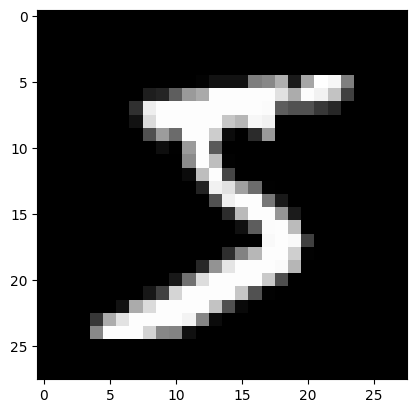

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# Display training input and its one-hot encoded target
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.show()
print(train_labels[0])

2. Defining a model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

3. Configuring the model

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Train the model

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7917 - loss: 0.6485
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9717 - loss: 0.0941
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9818 - loss: 0.0598
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9864 - loss: 0.0446
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0313


5. Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9794 - loss: 0.0679
Test accuracy: 0.9836000204086304


6. Deploy the model

Enter the path of the file: /content/digit7.jpg


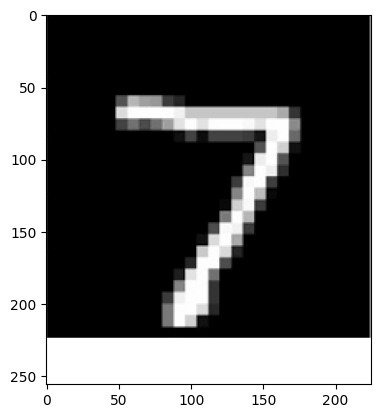

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 7


In [13]:
# prediction for sample input
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

file_path = input('Enter the path of the file: ')
img = plt.imread(file_path)
plt.imshow(img, cmap='gray')
plt.show()
#resize it to 28x28
img = Image.fromarray(img).convert('L')
img = img.resize((28, 28)) # Use resize instead of imresize
img = np.array(img)
img = img.reshape((1, 28, 28, 1))
img = img.astype('float32') / 255
prediction = model.predict(img)
print(f'Prediction: {np.argmax(prediction)}')